In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as shc
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import ConvexHull,convex_hull_plot_2d
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
#local path where the data locates, change it to your local path
record= pd.read_csv("Desktop/Carnivore_Research/CS_21Jan27.csv")

In [3]:
col=['Time_Seen','Species','Latitude','Longitude','Media']

In [4]:
record.columns = col
record['Time_Seen'] = pd.to_datetime(record.Time_Seen,utc=True).copy()
record['Month'] = record.Time_Seen.dt.month
record['Hour'] = record.Time_Seen.dt.hour
record['Year'] = record.Time_Seen.dt.year

In [5]:
#king county boundaries
maxLat = 47.7763
minLat = 47.1878
maxLon = -121.0941
minLon = -122.5346

In [6]:
rec19 = record[record.Year == 2019]
rec20 = record[record.Year == 2020]

In [7]:
rec19_coyo = rec19[rec19.Species == 'Coyote']
rec20_coyo = rec20[rec20.Species == 'Coyote']

In [8]:
rec19_coyo = rec19_coyo.drop(['Time_Seen','Species','Month','Hour','Year','Media'],axis=1)
rec20_coyo = rec20_coyo.drop(['Time_Seen','Species','Month','Hour','Year','Media'],axis=1)

In [9]:
rec19_king = rec19_coyo[(rec19_coyo['Latitude']>minLat)&(rec19_coyo['Latitude']<maxLat)&(rec19_coyo['Longitude']>minLon)&(rec19_coyo['Longitude']<maxLon)]
rec20_king = rec20_coyo[(rec20_coyo['Latitude']>minLat)&(rec20_coyo['Latitude']<maxLat)&(rec20_coyo['Longitude']>minLon)&(rec20_coyo['Longitude']<maxLon)]

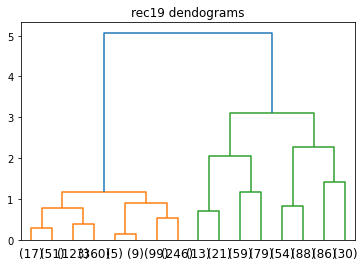

In [10]:
plt.title("rec19 dendograms")
dend = shc.dendrogram(shc.linkage(rec19_king,method='ward'),truncate_mode='level',p=3)

In [11]:
rec19_cluster3 = AgglomerativeClustering(n_clusters =3, affinity='euclidean',linkage='ward')
rec19_cluster3.fit_predict(rec19_king)

array([0, 1, 0, ..., 1, 1, 1])

Text(0.5, 1.0, 'Hierarchical Coyote cluster3')

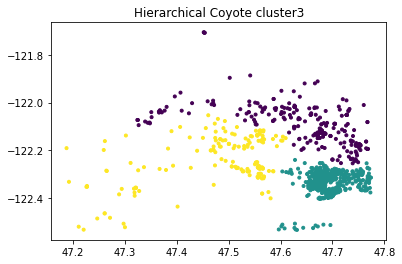

In [12]:
plt.scatter(rec19_king.iloc[:,0],rec19_king.iloc[:,1],c=rec19_cluster3.labels_,marker='.')
plt.title('Hierarchical Coyote cluster3')

In [13]:
rec19_cluster5 = AgglomerativeClustering(n_clusters =5, affinity='euclidean',linkage='ward')
rec19_cluster5.fit_predict(rec19_king)

array([3, 1, 0, ..., 1, 1, 1])

Text(0.5, 1.0, 'Hierarchical Coyote cluster5')

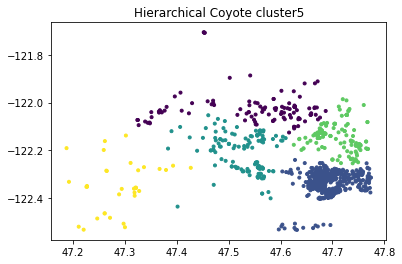

In [14]:
plt.scatter(rec19_king.iloc[:,0],rec19_king.iloc[:,1],c=rec19_cluster5.labels_,marker='.')
plt.title('Hierarchical Coyote cluster5')

In [15]:
#saving the dataframe to csv locally, used for importing to arcgis
HierClus = rec19_king.copy()
HierClus3DF = pd.DataFrame(HierClus)
HierClus3DF["labels"]= rec19_cluster3.labels_
HierClus3DF.to_csv('coyo19HierarchicalC3_lat_long.csv')

In [16]:
#saving the dataframe to csv locally, used for importing to arcgis
HierClus5DF = pd.DataFrame(HierClus)
HierClus5DF["labels"]= rec19_cluster5.labels_
HierClus5DF.to_csv('coyo19HierarchicalC5_lat_long.csv')

In [17]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import geopandas as gpd

/Users/yinyingliang/opt/anaconda3/envs/geo_env2/lib/python3.8/site-packages/geopandas/_compat.py:84: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.14.1). Conversions between both will be slow.
  warnings.warn(


In [18]:
rec19_king_numpy = rec19_king.to_numpy()
rec20_king_numpy = rec20_king.to_numpy()

# North Seattle

In [19]:
north_side = [(47.777104,-122.389053),(47.774561,-122.268551),(47.7330218,-122.2867455),
              (47.680809,-122.24555),(47.651215,-122.27679),
              (47.650981,-122.31833),(47.645201,-122.334468),(47.670876,-122.408617),(47.695826,-122.400731),
              (47.7461816,-122.3773824),(47.777104,-122.389053)]

In [20]:
polygon_north_side = Polygon(north_side)

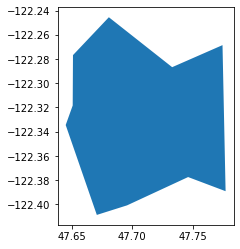

In [21]:
p = gpd.GeoSeries(polygon_north_side)
p.plot()
plt.show()

In [22]:
p_in_NorthSeattle_2019 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_north_side.contains(point)):
        p_in_NorthSeattle_2019.append(p)

In [23]:
df19 = pd.DataFrame(np.array(p_in_NorthSeattle_2019 ) , columns=['Lat','Long'])

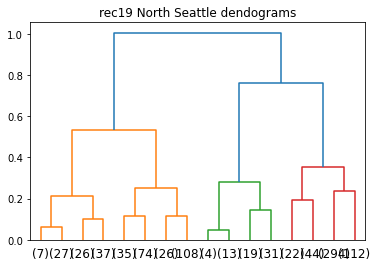

In [24]:
plt.title("rec19 North Seattle dendograms")
dend = shc.dendrogram(shc.linkage(df19,method='ward'),truncate_mode='level',p=3)

In [25]:
rec19_NorthSeattle = AgglomerativeClustering(n_clusters =5, affinity='euclidean',linkage='ward')
rec19_NorthSeattle.fit_predict(df19)

array([1, 1, 1, 0, 3, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 3, 1, 1, 1, 1, 4, 2,
       2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 3, 2, 3, 2, 2, 1, 3, 0, 1, 2, 1, 1,
       1, 3, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 3, 2, 4, 2, 1, 2, 2, 2, 2,
       0, 2, 3, 4, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 2, 4, 1,
       1, 1, 1, 3, 2, 2, 3, 1, 2, 1, 2, 2, 2, 3, 1, 2, 2, 1, 1, 2, 2, 1,
       0, 1, 1, 2, 3, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 4, 0, 2, 1,
       1, 2, 1, 2, 4, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 3, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 1, 2, 2, 2, 4, 1, 2, 3, 0, 2, 3, 1, 2, 2, 4, 1, 2,
       4, 2, 1, 1, 2, 2, 2, 1, 2, 3, 2, 4, 2, 2, 2, 1, 1, 2, 0, 1, 2, 2,
       2, 2, 4, 0, 3, 1, 2, 2, 2, 1, 2, 4, 2, 3, 0, 3, 2, 2, 2, 2, 2, 3,
       0, 3, 4, 4, 1, 2, 2, 1, 2, 4, 2, 3, 0, 1, 3, 4, 2, 2, 1, 2, 4, 1,
       1, 1, 1, 2, 3, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 3, 1, 2, 4, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 4, 2, 1, 4, 2, 3, 2, 2, 1, 2, 2, 1, 4, 1, 0, 1,
       0, 4, 2, 0, 1, 2, 0, 2, 2, 0, 0, 4, 2, 1, 2,

Text(0.5, 1.0, 'Hierarchical 2019 Coyote North Seattle clusters, N=5')

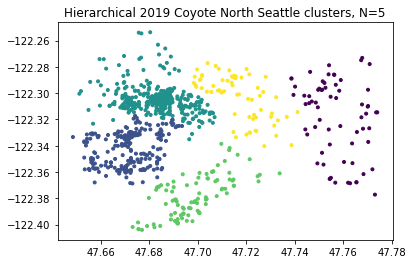

In [26]:
plt.scatter(df19.iloc[:,0],df19.iloc[:,1],c=rec19_NorthSeattle.labels_,marker='.')
plt.title('Hierarchical 2019 Coyote North Seattle clusters, N=5')

# North Seattle clusters sc

In [27]:
#silhouettes_score
silhouette_avg_north19 = silhouette_score(df19,rec19_NorthSeattle.labels_)
print("North Seattle cluster avg silhouette_score is: ", silhouette_avg_north19)

North Seattle cluster avg silhouette_score is:  0.44901029849569307


In [28]:
HierClusNorthSea19 = df19.copy()
HierClusNorthSea19["labels"]= rec19_NorthSeattle.labels_
HierClusNorthSea19.to_csv('coyo19Hierarchical_NorthSeattle_lat_long.csv')

# I90 North (East Seattle)

In [29]:
I90_north = [(47.770358,-122.261374),(47.773125,-121.892654),(47.5140603,-121.8823472),
             (47.536312,-121.946203),(47.539098,-122.016933),(47.581709,-122.132311),(47.588429,-122.19243),
            (47.618245,-122.241473),(47.770358,-122.261374)]

In [30]:
polygon_I90North = Polygon(I90_north)

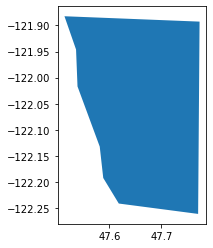

In [31]:
p = gpd.GeoSeries(polygon_I90North)
p.plot()
plt.show()

In [32]:
p_in_I90North_2019 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_I90North.contains(point)):
        p_in_I90North_2019.append(p)

In [33]:
df19_I90North = pd.DataFrame(np.array(p_in_I90North_2019) , columns=['Lat','Long'])

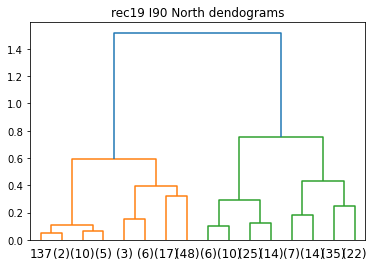

In [34]:
plt.title("rec19 I90 North dendograms")
dend = shc.dendrogram(shc.linkage(df19_I90North,method='ward'),truncate_mode='level',p=3)

In [35]:
rec19_I90North = AgglomerativeClustering(n_clusters =4, affinity='euclidean',linkage='ward')
rec19_I90North.fit_predict(df19_I90North)

array([0, 1, 2, 0, 0, 1, 1, 1, 0, 0, 1, 2, 0, 2, 2, 1, 3, 0, 1, 2, 2, 1,
       1, 2, 0, 1, 3, 1, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0,
       2, 3, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 2, 2, 2, 2,
       0, 2, 0, 2, 1, 1, 1, 2, 0, 0, 3, 0, 0, 1, 1, 0, 0, 1, 3, 2, 0, 0,
       1, 0, 1, 1, 1, 0, 3, 2, 1, 2, 0, 0, 2, 1, 3, 2, 1, 2, 2, 1, 2, 0,
       2, 0, 0, 1, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0,
       2, 3, 2, 1, 0, 3, 2, 1, 2, 1, 3, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 1,
       2, 0, 2, 0, 2, 0, 0, 2, 3, 1, 1, 1, 3, 1, 0, 1, 2, 2, 0, 2, 0, 1,
       3, 0, 1, 1, 1, 2, 0, 1, 2, 0, 2, 0, 3, 3, 0, 1, 0, 3, 2, 0, 1, 1,
       0, 1, 2, 3, 1, 1, 3, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 2, 0, 0, 0])

Text(0.5, 1.0, 'Hierarchical 2019 Coyote I90 North clusters, N=4')

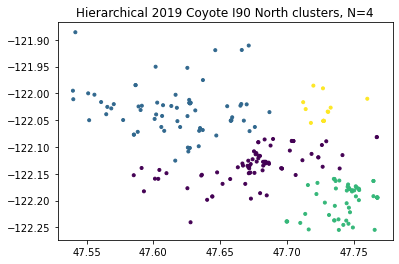

In [36]:
plt.scatter(df19_I90North.iloc[:,0],df19_I90North.iloc[:,1],c=rec19_I90North.labels_,marker='.')
plt.title('Hierarchical 2019 Coyote I90 North clusters, N=4')

# I90 north clusters sc

In [37]:
#silhouettes_score
silhouette_avg_I90north19 = silhouette_score(df19_I90North,rec19_I90North.labels_)
print("I90 North Seattle cluster avg silhouette_score is: ", silhouette_avg_I90north19)

I90 North Seattle cluster avg silhouette_score is:  0.43077112128250644


In [38]:
HierClusI90North19 = df19_I90North.copy()
HierClusI90North19["labels"]= rec19_I90North.labels_
HierClusI90North19.to_csv('coyo19Hierarchical_I90North_lat_long.csv')

# I90 South

In [39]:
I90_south = [(47.576632,-122.18962),(47.5682928,-122.1140904),(47.538633,-122.03856),
            (47.502895,-121.884035),(47.390086,-121.954792),(47.290048,-122.088687),
            (47.293774,-122.153229),(47.392408,-122.267215),(47.475785,-122.217428),
            (47.576632,-122.18962)]

In [40]:
polygon_I90South = Polygon(I90_south)

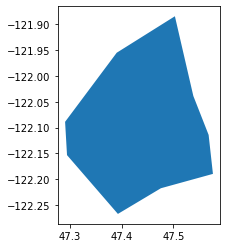

In [41]:
p = gpd.GeoSeries(polygon_I90South)
p.plot()
plt.show()

In [42]:
p_in_I90South_2019 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_I90South.contains(point)):
        p_in_I90South_2019.append(p)
        
df19_I90South = pd.DataFrame(np.array(p_in_I90South_2019) , columns=['Lat','Long'])

df19_I90South.count()

Lat     112
Long    112
dtype: int64

In [43]:
rec19_I90South = AgglomerativeClustering(n_clusters =4, affinity='euclidean',linkage='ward')
rec19_I90South.fit_predict(df19_I90South)

array([0, 1, 3, 1, 1, 1, 2, 3, 0, 1, 2, 0, 2, 3, 3, 0, 3, 2, 1, 0, 3, 3,
       3, 0, 1, 2, 2, 3, 3, 1, 3, 3, 3, 0, 3, 3, 0, 1, 1, 0, 2, 3, 1, 1,
       0, 3, 3, 3, 0, 3, 3, 1, 3, 3, 1, 0, 1, 0, 3, 1, 0, 0, 2, 3, 1, 1,
       3, 1, 0, 2, 2, 0, 2, 1, 2, 3, 3, 3, 1, 3, 3, 2, 1, 3, 1, 1, 3, 0,
       2, 0, 0, 0, 0, 1, 2, 3, 1, 0, 0, 1, 1, 3, 0, 1, 0, 3, 3, 2, 3, 3,
       3, 2])

Text(0.5, 1.0, 'Hierarchical 2019 Coyote I90 South clusters, N=4')

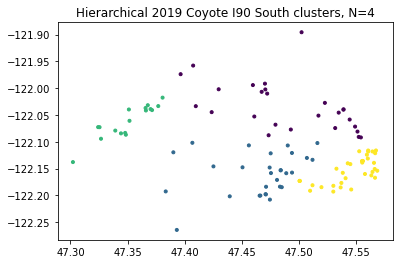

In [44]:
plt.scatter(df19_I90South.iloc[:,0],df19_I90South.iloc[:,1],c=rec19_I90South.labels_,marker='.')
plt.title('Hierarchical 2019 Coyote I90 South clusters, N=4')

# I90 south clusters sc

In [45]:
#silhouettes_score
silhouette_avg_I90south19 = silhouette_score(df19_I90South,rec19_I90South.labels_)
print("I90 South cluster avg silhouette_score is: ", silhouette_avg_I90south19)

I90 South cluster avg silhouette_score is:  0.40241115304610614


In [46]:
HierClusI90South19 = df19_I90South.copy()
HierClusI90South19["labels"]= rec19_I90South.labels_
HierClusI90South19.to_csv('coyo19Hierarchical_I90South_lat_long.csv')

# Downtown & South Seattle

In [47]:
dt_south_seattle = [(47.66399,-122.424283),(47.634808,-122.274235),(47.57883,-122.285917)
                    ,(47.55775,-122.246096),(47.5283192,-122.2769968),(47.492142,-122.214852),(47.422492,-122.271157)
                    ,(47.354863,-122.2729631),(47.290869,-122.247307),(47.257204,-122.277194),(47.265944,-122.333861),
                   (47.315072,-122.39913),(47.364632,-122.312668),(47.450838,-122.374843),(47.66399,-122.424283)]

In [48]:
polygon_dt_SouthSea = Polygon(dt_south_seattle)

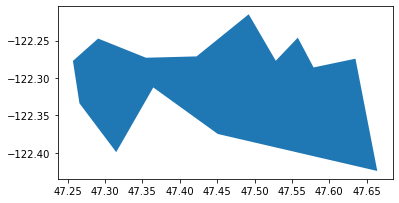

In [49]:
p = gpd.GeoSeries(polygon_dt_SouthSea)
p.plot()
plt.show()

In [50]:
p_in_dt_SouthSea_2019 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_dt_SouthSea.contains(point)):
        p_in_dt_SouthSea_2019.append(p)
        
df19_dt_SouthSea = pd.DataFrame(np.array(p_in_dt_SouthSea_2019) , columns=['Lat','Long'])

df19_dt_SouthSea.count()

Lat     86
Long    86
dtype: int64

In [51]:
rec19_Dt_South = AgglomerativeClustering(n_clusters =4, affinity='euclidean',linkage='ward')
rec19_Dt_South.fit_predict(df19_dt_SouthSea)

array([1, 0, 1, 1, 2, 1, 0, 3, 1, 0, 1, 3, 1, 3, 1, 1, 1, 0, 0, 2, 1, 3,
       1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 0, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1,
       0, 2, 3, 1, 0, 1, 3, 2, 1, 1, 2, 1, 1, 1, 1, 3, 0, 1, 2, 1, 3, 2,
       1, 2, 1, 3, 3, 3, 1, 1, 3, 3, 0, 0, 3, 1, 0, 1, 3, 3, 1, 1])

Text(0.5, 1.0, 'Hierarchical 2019 Coyote Downtown & South clusters, N=4')

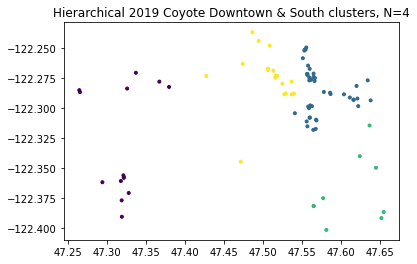

In [52]:
plt.scatter(df19_dt_SouthSea.iloc[:,0],df19_dt_SouthSea.iloc[:,1],c=rec19_Dt_South.labels_,marker='.')
plt.title('Hierarchical 2019 Coyote Downtown & South clusters, N=4')

# Dt & South clusters sc

In [53]:
#silhouettes_score
silhouette_avg_dt19 = silhouette_score(df19_dt_SouthSea,rec19_Dt_South.labels_)
print("Dt & South Seattle cluster avg silhouette_score is: ", silhouette_avg_dt19)

Dt & South Seattle cluster avg silhouette_score is:  0.44211748677980667


In [54]:
HierClusDtSouth19 = df19_dt_SouthSea.copy()
HierClusDtSouth19["labels"]= rec19_Dt_South.labels_
HierClusDtSouth19.to_csv('coyo19Hierarchical_DT_South_lat_long.csv')

# Greater North 

In [55]:
greaterNorth = [(47.777372,-122.394662),(47.772541,-121.88972),(47.513805,-121.880741),(47.538838,-122.026318)
                ,(47.571964,-122.103576),(47.586074,-122.200035),(47.650869,-122.281043),(47.644866,-122.337371)
               ,(47.672178,-122.410155),(47.777372,-122.394662)]

In [56]:
polygon_greaterNorth = Polygon(greaterNorth)

In [57]:
p_in_greaterNorth_2019 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_greaterNorth.contains(point)):
        p_in_greaterNorth_2019.append(p)
        
df19_greaterNorth = pd.DataFrame(np.array(p_in_greaterNorth_2019) , columns=['Lat','Long'])

df19_greaterNorth.count()

Lat     1105
Long    1105
dtype: int64

In [58]:
rec19_greaterNorth= AgglomerativeClustering(n_clusters =4, affinity='euclidean',linkage='ward')
rec19_greaterNorth.fit_predict(df19_greaterNorth)

array([0, 3, 2, ..., 1, 1, 1])

Text(0.5, 1.0, 'Hierarchical 2019 Coyote Greater North Seattle N=4')

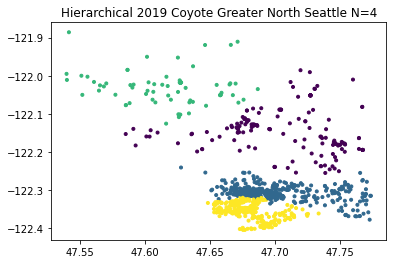

In [59]:
plt.scatter(df19_greaterNorth.iloc[:,0],df19_greaterNorth.iloc[:,1],c=rec19_greaterNorth.labels_,marker='.')
plt.title('Hierarchical 2019 Coyote Greater North Seattle N=4')

# Greater north clusters sc

In [60]:
#silhouettes_score
silhouette_avg_GreaterNorth19 = silhouette_score(df19_greaterNorth, rec19_greaterNorth.labels_)
print("Greater North Seattle cluster avg silhouette_score is: ", silhouette_avg_GreaterNorth19)

Greater North Seattle cluster avg silhouette_score is:  0.4062828784794511


In [61]:
HierClusGreaterNorth19 = df19_greaterNorth.copy()
HierClusGreaterNorth19["labels"]= rec19_greaterNorth.labels_
HierClusGreaterNorth19.to_csv('coyo19Hierarchical_GreaterNorth_lat_long.csv')

# Greater South

In [62]:
greater_eastSouth = [(47.664609,-122.425591),(47.641016,-122.330857),(47.637749,-122.278586),
                    (47.575772,-122.188764),(47.566449,-122.103713),(47.538528,-122.037022)
                    ,(47.504678,-121.885874),(47.289476,-122.088435),(47.261232,-122.282841)
                    ,(47.313805,-122.402232),(47.444488,-122.372019),(47.664609,-122.425591)]

In [63]:
polygon_greaterEastSouth = Polygon(greater_eastSouth)

In [64]:
p_in_greaterEastSouth_2019 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_greaterEastSouth.contains(point)):
        p_in_greaterEastSouth_2019.append(p)
        
df19_greaterEastSouth = pd.DataFrame(np.array(p_in_greaterEastSouth_2019) , columns=['Lat','Long'])

df19_greaterEastSouth.count()

Lat     197
Long    197
dtype: int64

In [65]:
rec19_greaterEastSouth= AgglomerativeClustering(n_clusters =4, affinity='euclidean',linkage='ward')
rec19_greaterEastSouth.fit_predict(df19_greaterEastSouth)

array([3, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 3, 3, 0, 1, 3, 1, 0, 3,
       2, 3, 1, 0, 3, 2, 3, 1, 3, 0, 1, 3, 1, 1, 3, 3, 2, 0, 3, 1, 0, 3,
       2, 0, 1, 2, 3, 3, 1, 2, 1, 3, 1, 3, 3, 3, 1, 0, 1, 3, 1, 0, 1, 3,
       1, 0, 3, 3, 0, 3, 1, 1, 3, 1, 0, 1, 1, 1, 0, 1, 3, 1, 1, 2, 1, 1,
       1, 3, 1, 2, 3, 2, 3, 0, 3, 1, 3, 1, 0, 0, 3, 3, 0, 3, 3, 1, 1, 1,
       1, 2, 1, 3, 0, 3, 0, 3, 2, 0, 3, 0, 3, 3, 0, 1, 0, 3, 3, 1, 1, 3,
       1, 1, 3, 1, 1, 0, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 3, 1, 3, 3, 3, 1,
       3, 0, 0, 0, 3, 0, 0, 1, 0, 1, 3, 1, 0, 3, 2, 3, 3, 0, 1, 1, 1, 0,
       1, 3, 3, 3, 0, 2, 1, 3, 3, 1, 2, 0, 1, 3, 3, 1, 3, 1, 3, 3, 0])

Text(0.5, 1.0, 'Hierarchical 2019 Coyote Greater East South Seattle N=4')

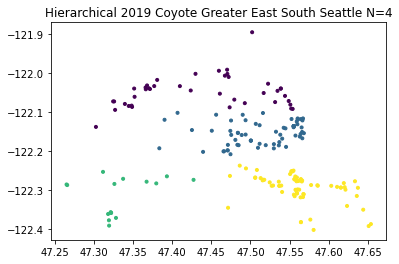

In [66]:
plt.scatter(df19_greaterEastSouth.iloc[:,0],df19_greaterEastSouth.iloc[:,1],c=rec19_greaterEastSouth.labels_,marker='.')
plt.title('Hierarchical 2019 Coyote Greater East South Seattle N=4')

# Greater south sc

In [67]:
#silhouettes_score
silhouette_avg_GreaterSouth19 = silhouette_score(df19_greaterEastSouth, rec19_greaterEastSouth.labels_)
print("Greater South Seattle cluster avg silhouette_score is: ", silhouette_avg_GreaterSouth19)

Greater South Seattle cluster avg silhouette_score is:  0.4889063177152299


In [68]:
HierClusGreaterEastSouth19 = df19_greaterEastSouth.copy()
HierClusGreaterEastSouth19["labels"]= rec19_greaterEastSouth.labels_
HierClusGreaterEastSouth19.to_csv('coyo19Hierarchical_GreaterEastSouth_lat_long.csv')

# Greater East

In [69]:
greater_east = [(47.770562,-122.261126),(47.773331,-121.89317),(47.514845,-121.882055)
               ,(47.346463,-122.001702),(47.29398,-122.125899),(47.391572,-122.267348)
               ,(47.479993,-122.210314),(47.57591,-122.189715),(47.618971,-122.241299)
               ,(47.770562,-122.261126)]

In [70]:
polygon_greaterEast = Polygon(greater_east)

In [71]:
p_in_greaterEast_2019 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_greaterEast.contains(point)):
        p_in_greaterEast_2019.append(p)
        
df19_greaterEast = pd.DataFrame(np.array(p_in_greaterEast_2019) , columns=['Lat','Long'])

df19_greaterEast.count()

Lat     335
Long    335
dtype: int64

In [72]:
rec19_greaterEast= AgglomerativeClustering(n_clusters =7, affinity='euclidean',linkage='ward')
rec19_greaterEast.fit_predict(df19_greaterEast)

array([3, 0, 1, 4, 2, 2, 3, 3, 2, 0, 2, 2, 1, 2, 0, 0, 3, 1, 2, 1, 3, 0,
       4, 3, 2, 4, 4, 0, 5, 3, 1, 0, 4, 4, 6, 2, 0, 0, 2, 4, 3, 6, 0, 5,
       0, 0, 4, 2, 0, 0, 4, 3, 6, 6, 0, 3, 4, 3, 6, 2, 3, 6, 0, 0, 3, 3,
       4, 1, 5, 4, 4, 0, 0, 2, 4, 3, 1, 3, 3, 1, 3, 6, 0, 0, 3, 3, 4, 0,
       0, 2, 2, 2, 2, 4, 4, 4, 4, 3, 4, 6, 3, 1, 6, 4, 0, 0, 2, 0, 4, 3,
       0, 3, 5, 2, 3, 3, 0, 2, 0, 3, 0, 3, 0, 1, 5, 6, 2, 4, 3, 3, 0, 3,
       2, 0, 6, 0, 6, 6, 0, 0, 2, 3, 6, 5, 6, 2, 4, 0, 4, 3, 3, 2, 6, 4,
       2, 1, 2, 0, 5, 4, 0, 4, 4, 0, 0, 4, 3, 6, 4, 3, 2, 3, 0, 3, 0, 0,
       0, 6, 0, 1, 2, 2, 2, 0, 3, 6, 2, 4, 0, 3, 0, 0, 0, 3, 1, 3, 0, 1,
       3, 3, 0, 4, 1, 3, 4, 2, 1, 5, 4, 0, 3, 5, 4, 0, 2, 4, 6, 0, 5, 6,
       4, 3, 3, 2, 4, 3, 3, 6, 3, 4, 0, 0, 4, 3, 2, 4, 3, 4, 6, 3, 4, 6,
       1, 5, 0, 2, 0, 2, 0, 5, 0, 3, 0, 4, 4, 3, 4, 3, 0, 5, 2, 3, 2, 0,
       0, 0, 6, 4, 1, 3, 0, 1, 2, 4, 0, 3, 4, 3, 5, 5, 3, 0, 1, 2, 3, 1,
       2, 5, 4, 2, 1, 0, 6, 0, 2, 0, 2, 6, 3, 0, 0,

Text(0.5, 1.0, 'Hierarchical 2019 Coyote Greater East Seattle N=7')

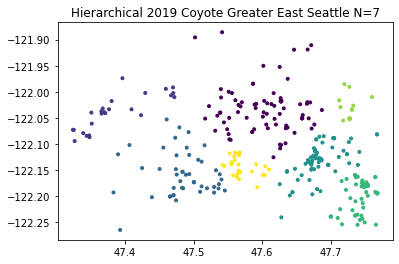

In [73]:
plt.scatter(df19_greaterEast.iloc[:,0],df19_greaterEast.iloc[:,1],c=rec19_greaterEast.labels_,marker='.')
plt.title('Hierarchical 2019 Coyote Greater East Seattle N=7')

# Greate east clusters sc

In [74]:
#silhouettes_score
silhouette_avg_GreaterEast19 = silhouette_score(df19_greaterEast, rec19_greaterEast.labels_)
print("Greater East Seattle cluster avg silhouette_score is: ", silhouette_avg_GreaterEast19)

Greater East Seattle cluster avg silhouette_score is:  0.39177105781387045


In [75]:
HierClusGreaterEast19 = df19_greaterEast.copy()
HierClusGreaterEast19["labels"]= rec19_greaterEast.labels_
HierClusGreaterEast19.to_csv('coyo19Hierarchical_GreaterEast_lat_long.csv')

# Greater West

In [76]:
greater_west = [(47.777472,-122.394388),(47.773291,-122.270148),(47.711415,-122.281049),
               (47.679093,-122.251523),(47.579081,-122.287169),(47.557828,-122.246743)
               ,(47.526758,-122.277642),(47.49199,-122.215828),(47.421875,-122.272144)
               ,(47.353515,-122.272809),(47.289761,-122.247392),(47.257172,-122.275544)
               ,(47.288795,-122.365513),(47.314376,-122.401898),(47.363311,-122.313343)
               ,(47.582352,-122.40741),(47.777472,-122.394388)]

In [77]:
polygon_greaterWest = Polygon(greater_west)

In [78]:
p_in_greaterWest_2019 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_greaterWest.contains(point)):
        p_in_greaterWest_2019.append(p)
        
df19_greaterWest = pd.DataFrame(np.array(p_in_greaterWest_2019) , columns=['Lat','Long'])

df19_greaterWest.count()

Lat     958
Long    958
dtype: int64

In [79]:
rec19_greaterWest= AgglomerativeClustering(n_clusters =8, affinity='euclidean',linkage='ward')
rec19_greaterWest.fit_predict(df19_greaterWest)

array([3, 3, 3, 0, 1, 5, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 5, 3, 3, 3, 3, 6,
       0, 0, 3, 2, 0, 3, 0, 0, 3, 0, 0, 0, 5, 0, 5, 0, 0, 3, 5, 1, 3, 4,
       0, 3, 3, 3, 0, 3, 0, 0, 0, 3, 4, 0, 3, 0, 3, 3, 5, 0, 6, 7, 0, 3,
       0, 0, 0, 0, 1, 0, 5, 6, 0, 4, 2, 4, 0, 3, 0, 1, 0, 0, 3, 0, 0, 1,
       0, 3, 0, 3, 0, 6, 3, 3, 3, 3, 5, 0, 4, 2, 0, 5, 3, 0, 0, 3, 0, 0,
       0, 5, 3, 0, 0, 3, 3, 0, 0, 3, 1, 3, 3, 0, 5, 4, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 4, 0, 6, 1, 0, 3, 3, 0, 3, 0, 6, 4, 4, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 0, 3, 0, 4, 3, 3, 0, 0,
       0, 6, 3, 0, 1, 4, 0, 5, 3, 2, 0, 0, 6, 3, 0, 6, 0, 3, 3, 0, 0, 0,
       3, 0, 5, 0, 6, 0, 0, 0, 3, 3, 0, 1, 3, 2, 0, 0, 0, 0, 6, 1, 5, 3,
       0, 0, 0, 3, 0, 6, 0, 5, 5, 4, 1, 5, 0, 0, 0, 0, 0, 5, 1, 5, 6, 6,
       3, 4, 0, 0, 3, 4, 0, 6, 0, 5, 1, 3, 5, 4, 6, 0, 0, 3, 0, 6, 3, 3,
       4, 3, 3, 0, 5, 3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 4, 5, 3, 0, 6, 0, 0,
       3, 3, 0, 4, 0, 3, 0, 3, 6, 0, 3, 6, 0, 5, 0,

Text(0.5, 1.0, 'Hierarchical 2019 Coyote Greater West Seattle N=8')

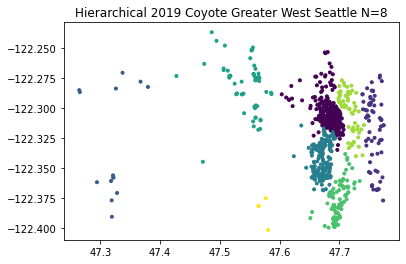

In [80]:
plt.scatter(df19_greaterWest.iloc[:,0],df19_greaterWest.iloc[:,1],c=rec19_greaterWest.labels_,marker='.')
plt.title('Hierarchical 2019 Coyote Greater West Seattle N=8')

# Greater west sc

In [81]:
#silhouettes_score
silhouette_avg_GreaterWest19 = silhouette_score(df19_greaterWest, rec19_greaterWest.labels_)
print("Greater West Seattle cluster avg silhouette_score is: ", silhouette_avg_GreaterWest19)

Greater West Seattle cluster avg silhouette_score is:  0.4453737622419085


In [82]:
HierClusGreaterWest19 = df19_greaterWest.copy()
HierClusGreaterWest19["labels"]= rec19_greaterWest.labels_
HierClusGreaterWest19.to_csv('coyo19Hierarchical_GreaterWest_lat_long.csv')

# I5 West

In [83]:
I5_west = [(47.776607,-122.393131),(47.776838,-122.32099),(47.749973,-122.332842),(47.731409,-122.323379)
          ,(47.691188,-122.331946),(47.684153,-122.324221),(47.675384,-122.320976),(47.63457,-122.324409)
          ,(47.60356,-122.334709),(47.573473,-122.32134),(47.553405,-122.323722),(47.540094,-122.303278)
          ,(47.488776,-122.270121),(47.432669,-122.273797),(47.408736,-122.306562),(47.354352,-122.298988)
          ,(47.268911,-122.320315),(47.319426,-122.412347),(47.348054,-122.319958),(47.578068,-122.410378)
          ,(47.606807,-122.342314),(47.661609,-122.432543),(47.717753,-122.37894),(47.776607,-122.393131)]

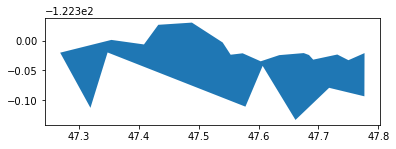

In [84]:
polygon_I5West = Polygon(I5_west)
p = gpd.GeoSeries(polygon_I5West)
p.plot()
plt.show()

In [85]:
p_in_I5West_2019 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_I5West.contains(point)):
        p_in_I5West_2019.append(p)
        
df19_I5West = pd.DataFrame(np.array(p_in_I5West_2019) , columns=['Lat','Long'])

df19_I5West.count()

Lat     381
Long    381
dtype: int64

In [86]:
rec19_I5West= AgglomerativeClustering(n_clusters =5, affinity='euclidean',linkage='ward')
rec19_I5West.fit_predict(df19_I5West)

array([2, 2, 2, 0, 4, 2, 4, 2, 2, 2, 2, 2, 3, 2, 2, 4, 4, 2, 0, 0, 2, 2,
       2, 2, 4, 2, 2, 2, 2, 2, 4, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 0, 0, 2, 2, 2, 0, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 4, 4, 2, 3, 2, 2, 2, 2, 4, 2, 2, 2, 3, 4, 2, 4, 4, 0,
       4, 0, 0, 4, 2, 2, 4, 2, 0, 2, 0, 2, 2, 2, 2, 4, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 4, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 4, 0, 2, 2,
       2, 2, 2, 4, 2, 0, 0, 0, 2, 4, 0, 2, 0, 4, 0, 4, 4, 2, 2, 2, 4, 2,
       2, 4, 2, 2, 0, 2, 2, 4, 2, 2, 2, 2, 2, 2, 0, 4, 4, 0, 4, 0, 4, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 4, 2, 3, 1, 2, 2, 4, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 1, 2, 4, 4, 2, 2, 0, 4, 0, 2, 4, 2, 2, 2, 2, 2,
       0, 2, 4, 2, 2, 2, 4, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 4, 0, 4,
       4, 0, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 3,
       2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 4, 2, 2, 2, 4,

Text(0.5, 1.0, 'Hierarchical 2019 Coyote I5 West Seattle N=5')

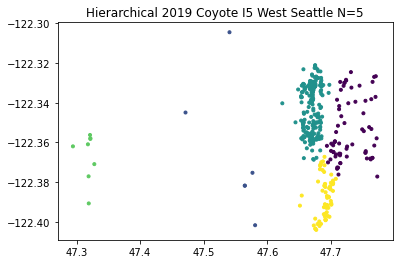

In [87]:
plt.scatter(df19_I5West.iloc[:,0],df19_I5West.iloc[:,1],c=rec19_I5West.labels_,marker='.')
plt.title('Hierarchical 2019 Coyote I5 West Seattle N=5')

In [88]:
HierClusI5West19 = df19_I5West.copy()
HierClusI5West19["labels"]= rec19_I5West.labels_
HierClusI5West19.to_csv('coyo19Hierarchical_I5West_lat_long.csv')

## I5 west silhouette scores

In [89]:
#silhouettes_score
silhouette_avg_I5West19 = silhouette_score(df19_I5West, rec19_I5West.labels_)
print("I5 West Seattle cluster avg silhouette_score is: ", silhouette_avg_I5West19)

I5 West Seattle cluster avg silhouette_score is:  0.5420083244462962


# I5 East

In [90]:
I5_east = [(47.776654,-122.316886),(47.769732,-121.973306),(47.662559,-121.902667)
          ,(47.483921,-121.877519),(47.263509,-122.07399),(47.252819,-122.291528)
          ,(47.273264,-122.308008),(47.471857,-122.264697),(47.511816,-122.273666)
          ,(47.525278,-122.290811),(47.556494,-122.315509),(47.567035,-122.320444)
          ,(47.683682,-122.319333),(47.686138,-122.324611),(47.696827,-122.328602)
          ,(47.734651,-122.321693),(47.743973,-122.328581),(47.755256,-122.328581),(47.776654,-122.316886)]

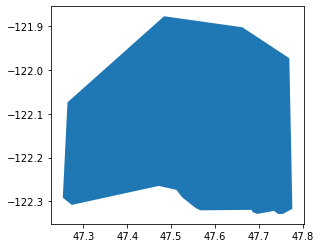

In [91]:
polygon_I5East = Polygon(I5_east)
p = gpd.GeoSeries(polygon_I5East)
p.plot()
plt.show()

In [92]:
p_in_I5East_2019 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_I5East.contains(point)):
        p_in_I5East_2019.append(p)
        
df19_I5East = pd.DataFrame(np.array(p_in_I5East_2019) , columns=['Lat','Long'])

df19_I5East.count()

Lat     925
Long    925
dtype: int64

In [93]:
rec19_I5East= AgglomerativeClustering(n_clusters =11, affinity='euclidean',linkage='ward')
rec19_I5East.fit_predict(df19_I5East)

array([ 9,  0,  1,  2,  7,  4,  1,  1,  4,  9,  1,  9,  1,  1,  1,  4,  0,
        1,  4,  8,  4,  1,  2,  4,  0,  0,  9,  2,  4,  1,  1,  1,  2,  1,
        3,  1,  1,  1,  0,  1,  1,  7,  3,  1,  1,  1,  4,  7,  7,  5,  1,
        0,  3,  9,  1,  1,  1,  1,  5,  1,  2,  1,  0,  7,  7,  1,  1, 10,
        1,  4,  1,  1,  0,  1,  1,  0,  8,  1,  4,  1,  1,  5,  6,  5,  1,
        7,  9,  1, 10,  1,  0,  3,  1,  0,  0,  1,  7,  1,  8,  1,  1,  1,
        6,  1,  1,  1,  5,  6,  1,  1,  1,  1,  1,  1,  4,  1,  0,  1,  1,
        0,  1,  7,  8,  3, 10,  1, 10,  5,  0,  3,  8,  8,  7,  1,  1,  1,
        1,  1,  1,  9,  1, 10,  1,  5,  1,  1,  8,  1,  4,  3,  1, 10,  0,
        1,  5,  0,  5,  1,  3,  1,  1,  6,  1,  1,  1,  9,  1,  1,  1,  7,
        1,  2,  1,  1,  1,  1,  3,  7,  5,  7,  6,  1,  0,  1,  1,  1,  0,
        4,  1,  7,  9,  2,  8,  5,  1,  1,  1,  1,  9,  1,  1,  1,  9,  2,
        1,  1,  1,  1,  9, 10,  1,  1,  1,  0,  1,  1,  1,  0,  9,  8,  1,
        1,  1,  1,  1,  8

Text(0.5, 1.0, 'Hierarchical 2019 Coyote I5 East Seattle N=5')

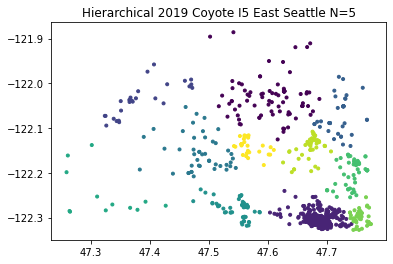

In [94]:
plt.scatter(df19_I5East.iloc[:,0],df19_I5East.iloc[:,1],c=rec19_I5East.labels_,marker='.')
plt.title('Hierarchical 2019 Coyote I5 East Seattle N=5')

In [95]:
HierClusI5East19 = df19_I5East.copy()
HierClusI5East19["labels"]= rec19_I5East.labels_
HierClusI5East19.to_csv('coyo19Hierarchical_I5East_lat_long.csv')

## I5 east silhouette scores

In [96]:
#silhouettes_score
silhouette_avg_I5East19 = silhouette_score(df19_I5East, rec19_I5East.labels_)
print("I5 East Seattle cluster avg silhouette_score is: ", silhouette_avg_I5West19)

I5 East Seattle cluster avg silhouette_score is:  0.5420083244462962


# North Seattle I5 West

In [99]:
north_I5West = [(47.777582,-122.393571),(47.777063,-122.31907),(47.75349,-122.33195)
               ,(47.743563,-122.330749),(47.731182,-122.324183),(47.695925,-122.331092)
               ,(47.68359,-122.32384),(47.675427,-122.321018),(47.653452,-122.323363)
               ,(47.645024,-122.334349),(47.668713,-122.406661),(47.695749,-122.403716)
               ,(47.722332,-122.374118),(47.777582,-122.393571)]

In [101]:
polygon_NorthI5West = Polygon(north_I5West)
p_in_NorthI5West_2019 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_NorthI5West.contains(point)):
        p_in_NorthI5West_2019.append(p)
        
df19_NorthI5West = pd.DataFrame(np.array(p_in_NorthI5West_2019) , columns=['Lat','Long'])

df19_NorthI5West.count()

Lat     363
Long    363
dtype: int64

In [102]:
rec19_NorthI5West= AgglomerativeClustering(n_clusters =3, affinity='euclidean',linkage='ward')
rec19_NorthI5West.fit_predict(df19_NorthI5West)

array([1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 0, 2, 0, 0, 2, 1,
       1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 1, 1, 2, 1,
       0, 0, 0, 1, 2, 0, 1, 0, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2,
       2, 1, 1, 0, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 1,
       1, 2, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1,

Text(0.5, 1.0, 'Hierarchical 2019 Coyote North I5 West Seattle N=5')

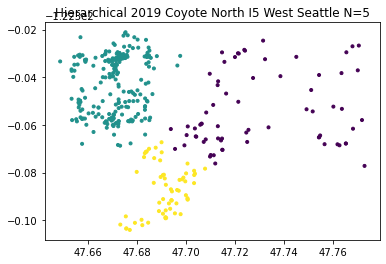

In [104]:
plt.scatter(df19_NorthI5West.iloc[:,0],df19_NorthI5West.iloc[:,1],c=rec19_NorthI5West.labels_,marker='.')
plt.title('Hierarchical 2019 Coyote North Seattle I5 West Seattle N=3')

In [105]:
HierClusNorthI5West19 = df19_NorthI5West.copy()
HierClusNorthI5West19["labels"]= rec19_NorthI5West.labels_
HierClusNorthI5West19.to_csv('coyo19Hierarchical_NorthI5West_lat_long.csv')

## North Seattle I5 West silhouette score

In [106]:
#silhouettes_score
silhouette_avg_NorthI5West19 = silhouette_score(df19_NorthI5West, rec19_NorthI5West.labels_)
print("North I5 West Seattle cluster avg silhouette_score is: ", silhouette_avg_NorthI5West19)

North I5 West Seattle cluster avg silhouette_score is:  0.5393109099311544


# North Seattle I5 East 

In [107]:
north_I5East = [(47.776966,-122.316826),(47.77538,-122.267817),(47.753716,-122.274812)
               ,(47.734184,-122.289579),(47.680384,-122.248595),(47.646914,-122.277606)
               ,(47.654357,-122.321337),(47.680037,-122.320769),(47.682739,-122.320448)
               ,(47.685447,-122.323816),(47.695406,-122.328655),(47.739373,-122.321528)
               ,(47.743557,-122.328866),(47.756354,-122.328308),(47.776966,-122.316826)]

In [108]:
polygon_NorthI5East = Polygon(north_I5East)

p_in_NorthI5East_2019 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_NorthI5East.contains(point)):
        p_in_NorthI5East_2019.append(p)
        
df19_NorthI5East = pd.DataFrame(np.array(p_in_NorthI5East_2019) , columns=['Lat','Long'])

df19_NorthI5East.count()

Lat     516
Long    516
dtype: int64

In [109]:
rec19_NorthI5East= AgglomerativeClustering(n_clusters =2, affinity='euclidean',linkage='ward')
rec19_NorthI5East.fit_predict(df19_NorthI5East)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

Text(0.5, 1.0, 'Hierarchical 2019 Coyote North Seattle I5 East Seattle N=2')

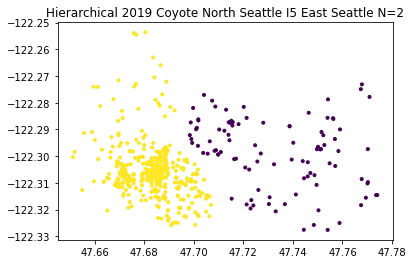

In [110]:
plt.scatter(df19_NorthI5East.iloc[:,0],df19_NorthI5East.iloc[:,1],c=rec19_NorthI5East.labels_,marker='.')
plt.title('Hierarchical 2019 Coyote North Seattle I5 East Seattle N=2')

In [111]:
HierClusNorthI5East19 = df19_NorthI5East.copy()
HierClusNorthI5East19["labels"]= rec19_NorthI5East.labels_
HierClusNorthI5East19.to_csv('coyo19Hierarchical_NorthI5East_lat_long.csv')

## North Seattle I5 East silhouette score

In [112]:
#silhouettes_score
silhouette_avg_NorthI5East19 = silhouette_score(df19_NorthI5East, rec19_NorthI5East.labels_)
print("North I5 East Seattle cluster avg silhouette_score is: ", silhouette_avg_NorthI5East19)

North I5 East Seattle cluster avg silhouette_score is:  0.6022122828101603


## Compare with North Seattle without being divided by I5

In [113]:
print("North Seattle cluster avg silhouette_score is: ", silhouette_avg_north19)
print("North Seattle I5 West cluster avg silhouette_score is: ", silhouette_avg_NorthI5West19)
print("North Seattle I5 East cluster avg silhouette_score is: ", silhouette_avg_NorthI5East19)

North Seattle cluster avg silhouette_score is:  0.44901029849569307
North Seattle I5 West cluster avg silhouette_score is:  0.5393109099311544
North Seattle I5 East cluster avg silhouette_score is:  0.6022122828101603


# Hierarchical Silhouette scores of all subregions

In [97]:
print("Hierarchical Clutering silhouette score evaluations")
print("\n")
print("North Seattle cluster avg silhouette_score is: ", silhouette_avg_north19)
print('-----------------------------------------------------------------------------------')
print("I90 North Seattle cluster avg silhouette_score is: ", silhouette_avg_I90north19)
print('-----------------------------------------------------------------------------------')
print("I90 South Seattle cluster avg silhouette_score is: ", silhouette_avg_I90south19)
print('-----------------------------------------------------------------------------------')
print("Dt & South Seattle cluster avg silhouette_score is: ", silhouette_avg_dt19)
print('-----------------------------------------------------------------------------------')
print("Greater North Seattle cluster avg silhouette_score is: ", silhouette_avg_GreaterNorth19)
print('-----------------------------------------------------------------------------------')
print("Greater South Seattle cluster avg silhouette_score is: ", silhouette_avg_GreaterSouth19)
print('-----------------------------------------------------------------------------------')
print("Greater East Seattle cluster avg silhouette_score is: ", silhouette_avg_GreaterEast19)
print('-----------------------------------------------------------------------------------')
print("Greater West Seattle cluster avg silhouette_score is: ", silhouette_avg_GreaterWest19)

Hierarchical Clutering silhouette score evaluations


North Seattle cluster avg silhouette_score is:  0.44901029849569307
-----------------------------------------------------------------------------------
I90 North Seattle cluster avg silhouette_score is:  0.43077112128250644
-----------------------------------------------------------------------------------
I90 South Seattle cluster avg silhouette_score is:  0.40241115304610614
-----------------------------------------------------------------------------------
Dt & South Seattle cluster avg silhouette_score is:  0.44211748677980667
-----------------------------------------------------------------------------------
Greater North Seattle cluster avg silhouette_score is:  0.4062828784794511
-----------------------------------------------------------------------------------
Greater South Seattle cluster avg silhouette_score is:  0.4889063177152299
-----------------------------------------------------------------------------------
Greater